/home/mariajose/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mariajose/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mariajose/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mariajose/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<IPython.core.display.Javascript object>


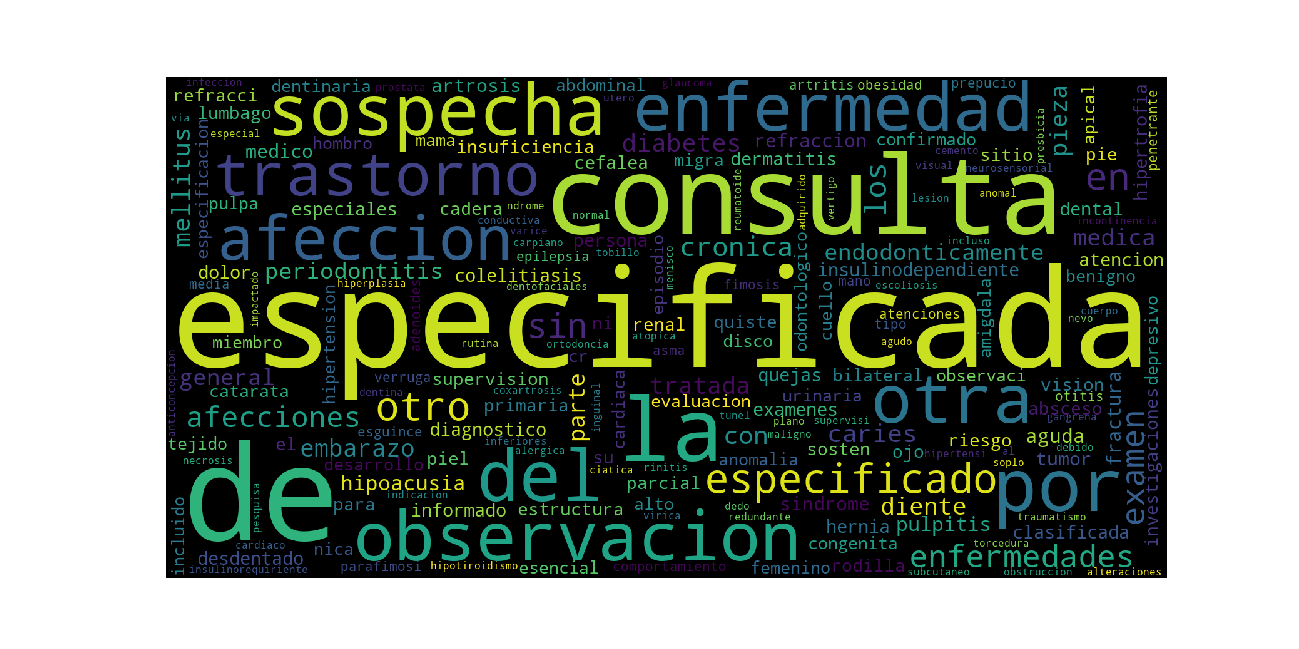

Stemming: ['enfermera', 'enfermo', 'especificada', 'consulta']


In [16]:
# Pregunta 1: Limpieza de la base de datos

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk # librería para tokenizar el texto.
from nltk import stem

csv_file = "aysen_exercice.csv"
datos = pd.read_csv(csv_file, sep = ';')
#data = pd.read_csv("filename.csv") 

# Descargamos las stopwords
# Estas nos sirven para descartar aquellas que no aportan al texto 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet') 
stopwords = nltk.corpus.stopwords.words('spanish')
set(stopwords)


description = datos.loc[:,"SOSPECHA_DIAG"].str.cat(sep=',')

# Contamos las derivaciones para cada especialidad para identificar las que tienen mas de 10000 filas
D10K = datos.loc[:,"PRESTA_EST"].value_counts()[:10]

D10K.head(5)


# cambiamos a minusculas
cambiando_a_minusculas = datos['SOSPECHA_DIAG'].str.lower()


# Buscamos las prestaciones de acuerdo a traumatologia
traumatologia = datos[datos['PRESTA_EST'].str.contains("TRAUMATOLOGIA")]

# eliminamos los caracteres non-ascii y tokenizamos las palabas
cambiando_a_minusculas = cambiando_a_minusculas.str.replace(r"[^A-Za-z0-9_]"," ")

cambiando_a_minusculas

#Lista de stopwords y eliminamos las palabras.
lista_texto_filtrada = [word for word in cambiando_a_minusculas if word not in stopwords]
lista_texto_filtrada

# Filtramos el texto y graficamos las palabras más usadas
lista_texto_filtrada = ' '.join(lista_texto_filtrada)
wordcloud_filtered = WordCloud(width=1600, height=800, collocations=False).generate(lista_texto_filtrada)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_filtered)
plt.axis("off")
plt.show()

# Stemming
porter = stem.porter.PorterStemmer()


# Stemming: usamos heuristicas para cortar la uñtima parte del lenguaje
lista_palabras = ['enfermera', 'enfermo', 'especificada', 'consulta']
stem_list = [porter.stem(word) for word in lista_palabras]
print("Stemming:", stem_list)




In [17]:
# Pregunta 2: Analisis no-supervisado y visualizacion
D10K

TRAUMATOLOGIA           24004
OFTALMOLOGIA            21482
CIRUGIA ADULTO          17321
OTORRINOLARINGOLOGIA    13663
NEUROLOGIA              12316
MEDICINA INTERNA        11408
GINECOLOGIA             10871
ENDODONCIA              10225
DERMATOLOGIA             8949
PEDIATRIA                8130
Name: PRESTA_EST, dtype: int64

<IPython.core.display.Javascript object>


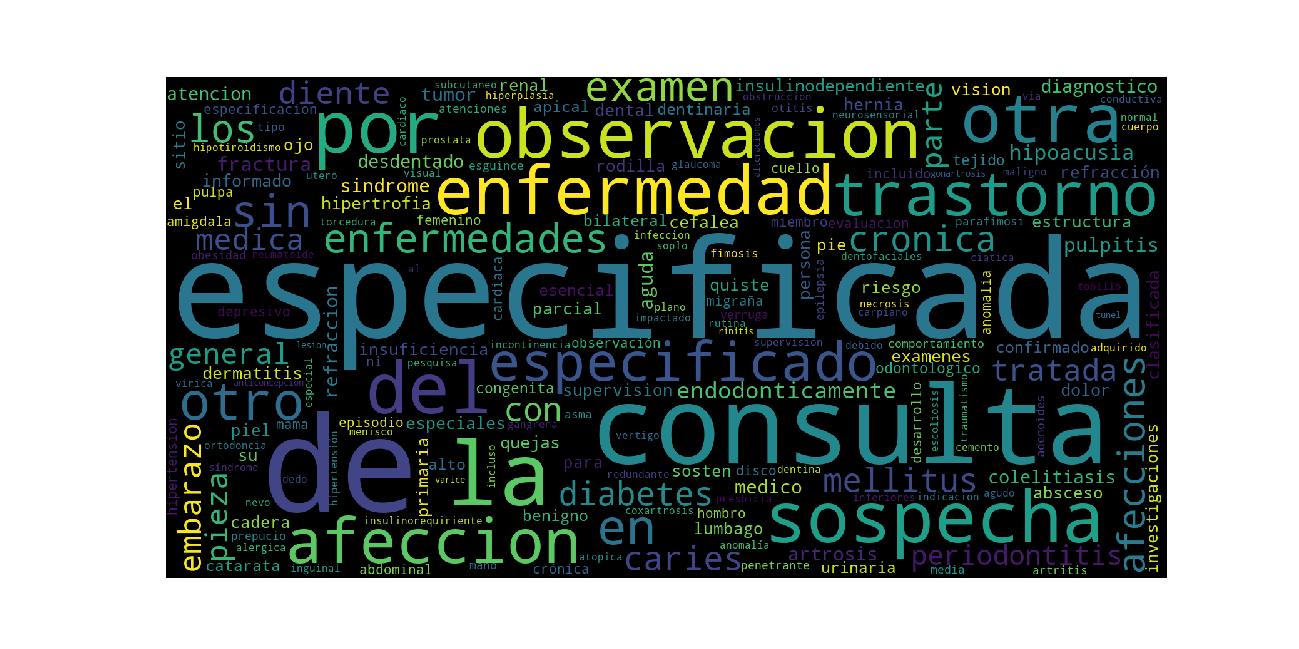

In [18]:
# Visualizacion de las palabras mas comunes para cada categoria

all_text = ' '.join(datos['SOSPECHA_DIAG']).lower()

wordcloud_all = WordCloud(width=1600, height=800, collocations=False).generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_all)
plt.axis("off")
plt.show()

In [37]:
# Calcular las matrices TF-IDF

import numpy as np
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk # librería para tokenizar el texto.
from nltk import stem
from sklearn.decomposition import NMF


# Descargamos las stopwords
# Estas nos sirven para descartar aquellas que no aportan al texto 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet') 
stopwords = nltk.corpus.stopwords.words('spanish')
set(stopwords)


#  Buscamos las categorias 
# TRAUMATOLOGIA           24004
# OFTALMOLOGIA            21482
# CIRUGIA ADULTO          17321
# OTORRINOLARINGOLOGIA    13663
# NEUROLOGIA              12316
# MEDICINA INTERNA        11408
# GINECOLOGIA             10871
# ENDODONCIA              10225
# DERMATOLOGIA             8949
# PEDIATRIA                8130

muestras = 2000
caracteristicas = 1000
topicos = 10
numero_palabras = 20

# Vectoriza las palabras de acuerdo al español y transforma los datos de acuerdo a las categorias
vectorizacion = TfidfVectorizer(stopwords)
x = vectorizacion.fit_transform(datos['SOSPECHA_DIAG'])

# Imprime los valores
print(x)

# Ajusta el modelo con NMF con n muestras y n caracteristicas
print("Ajusta el modelo con n muestras=%d and n caracteristicas=%d...% ", (muestras, caracteristicas))
nmf = NMF(n_components=topicos, random_state=1).fit(x)

nombres_caracteristicos = vectorizacion.get_feature_names()

for topico_idx, topico in enumerate(nmf.components_):
    print("Topico #%d:" % topico_idx)
    print(" ".join([nombres_caracteristicos[i]
                    for i in topico.argsort()[:-numero_palabras - 1:-1]]))
    print()




[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mariajose/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mariajose/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mariajose/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  (0, 702)	0.6034558736830801
  (0, 1390)	0.18716194746965217
  (0, 30)	0.4964900949607912
  (0, 889)	0.5952386072345965
  (1, 1320)	0.6849225556841491
  (1, 4198)	0.7286158745972351
  (2, 5130)	0.3698784337703375
  (2, 2085)	0.3692107500942385
  (2, 5213)	0.3648549454236745
  (2, 1579)	0.3199233476680875
  (2, 3248)	0.28386096307329
  (2, 1985)	0.3031255001797301
  (2, 154)	0.2865103175352673
  (2, 3997)	0.2400779949511357
  (2, 1390)	0.42333859466526197
  (3, 4684)	0.5010042297238971
  (3, 1117)	0.3379747888347667
  (3, 3999)	0.27457462881316597
  (3, 3253)	0.47513323286645553
  (3, 1604)	0.4655667041790758
  (3, 5417)	0.30413703879217724
  (3, 1390)	0.15611948546994478
  (4, 702)	0.6034558736830801
  (4, 1390)	0.18716194746965217
  (4, 30)	0.4964900949607912
  :	:
  (217887, 1984)	0.5505003682302679
  (217887, 3773)	0.4995322077712835
  (217888, 1188)	0.6688923067112422
  (217888, 1984)	0.5505003682302679
  (217888, 3773)	0.4995322077712835
  (217889, 4604)	0.5661300274750938
  (217

<IPython.core.display.Javascript object>


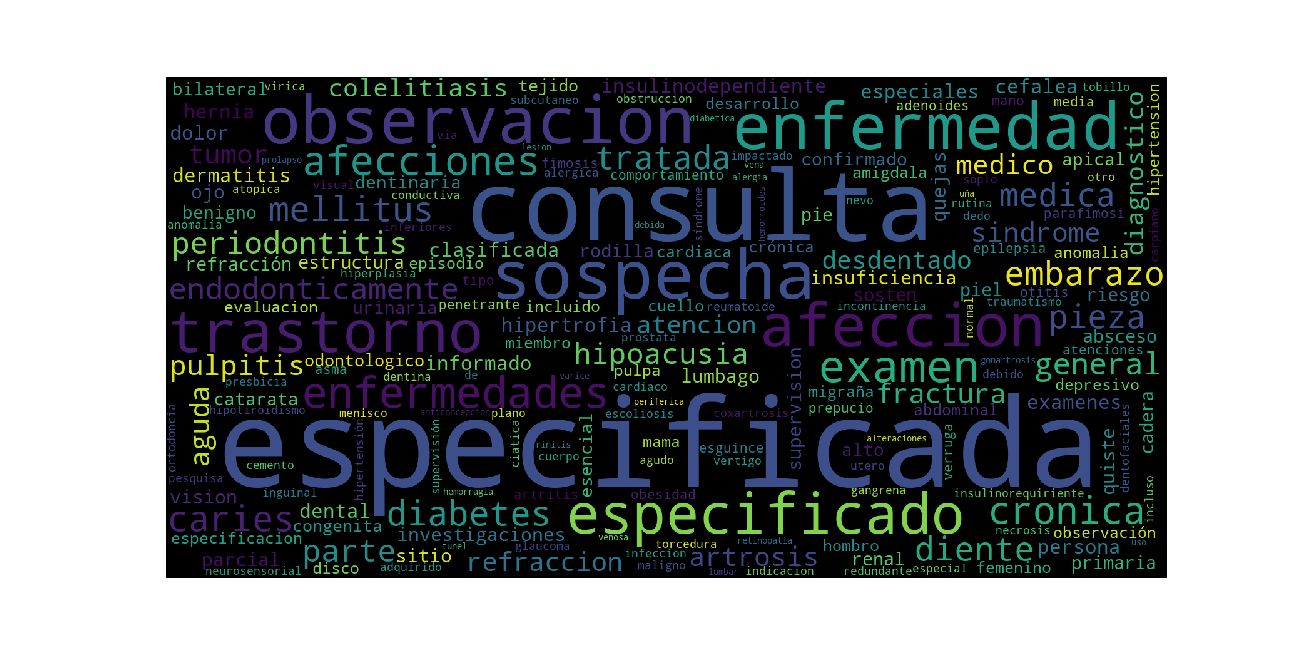

Primeras 0 palabras listas
Primeras 100 palabras listas
Primeras 200 palabras listas
Primeras 300 palabras listas
Primeras 400 palabras listas
Primeras 500 palabras listas
Primeras 600 palabras listas
Primeras 700 palabras listas
Primeras 800 palabras listas
Primeras 900 palabras listas
Primeras 1000 palabras listas
Primeras 1100 palabras listas
Primeras 1200 palabras listas
Primeras 1300 palabras listas
Primeras 1400 palabras listas
Primeras 1500 palabras listas
Primeras 1600 palabras listas
Primeras 1700 palabras listas
Primeras 1800 palabras listas
Primeras 1900 palabras listas
Primeras 2000 palabras listas
Primeras 2100 palabras listas
Primeras 2200 palabras listas
Primeras 2300 palabras listas
Primeras 2400 palabras listas
Primeras 2500 palabras listas
Primeras 2600 palabras listas
Primeras 2700 palabras listas
Primeras 2800 palabras listas
Primeras 2900 palabras listas
Primeras 3000 palabras listas
Primeras 3100 palabras listas
Primeras 3200 palabras listas
Primeras 3300 palabras

<IPython.core.display.Javascript object>


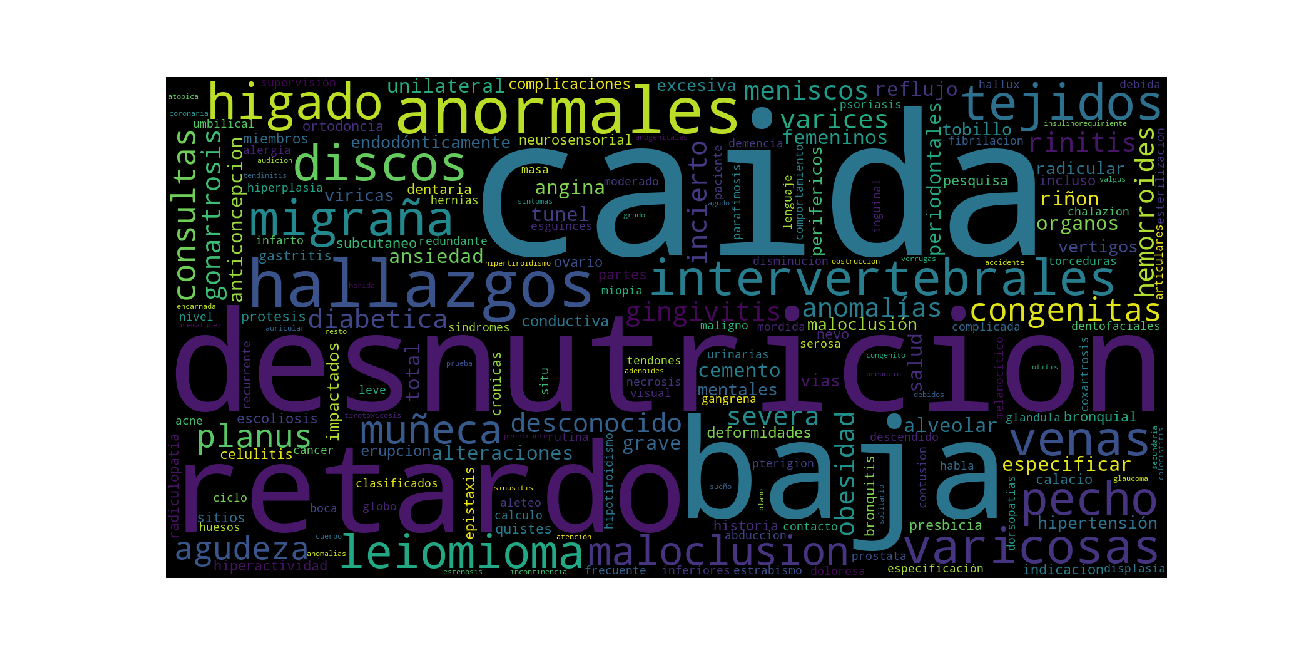

In [26]:
all_text_list = all_text.split(' ')
filtered_text_list = [word for word in all_text_list if word not in stopwords_spanish]
filtered_text_list

#%%

filtered_text = ' '.join(filtered_text_list)
wordcloud_filtered = WordCloud(width=1600, height=800, collocations=False).generate(filtered_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_filtered)
plt.axis("off")
plt.show()

#%% md

### TF-IDF

#%%

def filter_words(row):
    '''Tokeniza una fila, elimina los caracteres no alfanuméricos 
    y retorna sólo aquellas palabras que no son stopwords
    '''
    words = nltk.word_tokenize(row.lower())
    f_words = [word for word in words if word.isalpha() and word not in stopwords_spanish]
    return ' '.join(f_words)

row = "LA... CASA, (EN) EL áRbOL"
filter_words(row)

#%%

df_no_stopwords = datos['SOSPECHA_DIAG'].apply(filter_words)
len(df_no_stopwords)

#%%

df_no_stopwords.head(10)

#%%

words = nltk.word_tokenize(' '.join(df_no_stopwords))
words[:20], len(words)

#%%

unique_words = set(words)
len(unique_words)

#%%

def calc_idf(word, corpus):
    N = len(corpus)
    counter = 0
    for row in corpus:
        if word in row:
            counter += 1
    return np.log(N/(1+counter))

#%%

dict_idf = {}
for i, word in enumerate(unique_words):
    if i%100 == 0:
        print('Primeras', i, 'palabras listas')
    dict_idf[word] = calc_idf(word, df_no_stopwords)

#%%

sorted_idf = {k: v for k, v in sorted(dict_idf.items(), reverse=True, key=lambda item: item[1])}
sorted_idf

#%%

import collections
all_rows_merged = ' '.join(df_no_stopwords)
all_tokens = nltk.word_tokenize(all_rows_merged)
all_tokens[:20], len(all_tokens) 
dict_joint_tf = collections.Counter()
dict_joint_tf.update(all_tokens)
dict_joint_tf

#%%

sorted_tf = {k: v for k, v in sorted(dict_joint_tf.items(), reverse=True, key=lambda item: item[1])}
sorted_tf

#%%

tf_idf = {}
for word in dict_idf:
    tf_idf[word] = dict_idf[word]*np.log(1 + dict_joint_tf[word])

sorted_tf_idf = {k: v for k, v in sorted(tf_idf.items(), reverse=True, key=lambda item: item[1])}
sorted_tf_idf

#%%

wordcloud_tfidf = WordCloud(width=1600, height=800).generate_from_frequencies(tf_idf)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_tfidf)
plt.axis("off")
plt.show()

#%%